In [22]:
#Problem 1a

#In Writeup

In [23]:
#Problem 1b

import numpy as np

x = [];
y = [];
xy_sum = 0;
xx_sum = 0;

n = input("N: ");
for i in range(int(n)):
    x_init, y_init = input("Coordinate: ").split(",");
    x.append(int(x_init));
    y.append(int(y_init));
    xy_sum += int(x_init) * int(y_init);
    xx_sum += int(x_init) * int(x_init);
    
A = [int(n), sum(x)], [sum(x), xx_sum];
B = [sum(y), xy_sum];
C = np.linalg.solve(A, B);
print("\nb_0: ", C[0]);
print("b_1: ", C[1]);

N: 5
Coordinate: -2,2
Coordinate: 2,4
Coordinate: 3,8
Coordinate: 5,11
Coordinate: 4,17

b_0:  4.273972602739726
b_1:  1.7191780821917808


In [24]:
#Problem 1c

import numpy as np
import csv

x = [];
y = [];
n = 0;
xy_sum = 0;
xx_sum = 0;


with open('p1_data.csv') as csv_file: 
    data = csv.reader(csv_file, delimiter=',');
    next(data);
    
    for row in data:
        n += 1;
        x_init = row[0];
        y_init = row[1];
        x.append(float(x_init));
        y.append(float(y_init));
        xy_sum += float(x_init) * float(y_init);
        xx_sum += float(x_init) * float(x_init);
    
A = [n, sum(x)], [sum(x), xx_sum];

B = [sum(y), xy_sum];
C = np.linalg.solve(A, B);

print("b_0: ", C[0]);
print("b_1: ", C[1]);

b_0:  4.080657141896076
b_1:  -0.442369138504379


In [25]:
#Problem 2a

def includes(item, val, start_ind=None):
    if (type(item) is list): #List
        if (start_ind == None): 
            for i in range(len(item)):
                if (item[i] == val):
                    return True
        else: 
            for i in range(start_ind, len(item)):
                if (item[i] == val):
                    return True
    elif (type(item) is str):
        if (start_ind == None): 
            for i in range(len(item)):
                if (item[i] == val):
                    return True
        else: 
            for i in range(start_ind, len(item)):
                if (item[i] == val):
                    return True
    else: #Dictionary
        for j in item.keys():
            if (item[j] == val):
                return True
    
    return False

print(includes([2, 3, 4], 2, 0));
print(includes([2, 3, 4], 2, 1));
print(includes([2, 3, 4], 4, 1) );
print(includes({'a':1,'b':2}, 1) );
print(includes({'a':1,'b':2}, 'a'));
print(includes('abcd', 'b'));

True
False
True
True
False
True


In [26]:
#Problem 2b

array = [];
def moving_average():
    def value_calc(x):
        mean = 0.0;
        i = 1;
        array.append(x);
        for i in range(len(array)):
            mean += array[i];
        mean = mean / len(array);
        return mean;
    return value_calc;
        
    
mAvg = moving_average();
print(mAvg(10));
print(mAvg(11));
print(mAvg(12));

10.0
10.5
11.0


In [27]:
#Problem 2c

def same_frequency(num1, num2):
    copy_one = str(num1);
    copy_two = str(num2);
    while (num1 > 0 and num2 > 0):
        num1 = num1 / 10;
        num2 = num2 / 10;
        
    if ((num1 == 0 and num2 == 0)) or (len(copy_one) == len(copy_two)):
        if sorted(copy_one) == sorted(copy_two):
            return True;
    return False;

print(same_frequency(551122,221515)); 
print(same_frequency(321142,3212215)); 
print(same_frequency(12345,31354)); 
print(same_frequency(1212, 2211));

True
False
False
True


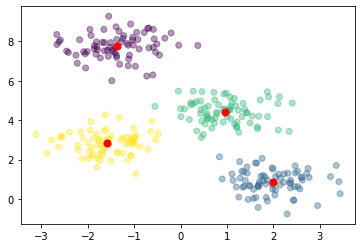

In [28]:
#Problem 2d

import matplotlib.pyplot as plt

x = [];
y = [];
x_new = 0;
y_new = 0;

npzfile = np.load('kmeans.npz');
data = npzfile['data'];
pred = npzfile['pred'];
centers = npzfile['centers'];

fig = plt.figure()
ax = fig.add_subplot(111)

for k in range(len(data)):
    x.append(data[k][0]);
    y.append(data[k][1]);
ax.scatter(x, y, c = pred, alpha=0.4);
for i, j in centers:
   ax.scatter(i, j, s=50, c='red');

In [29]:
#Problem 2e

import numpy as np

np.random.seed(24787)
X = np.random.randint(-1000, 1000, size=3000)
Y = np.random.randint(-1000, 1000, size=3000)

def NUMPY_outer(X,Y):
    i = 1;
    j = 1;
    mat = np.zeros((len(X),len(Y)));
                   
    for i in range(len(X)):
        for j in range(len(Y)):
            mat[i][j] = X[i] * Y[j];
            j = j + 1;
        i = i + 1;
    return mat
code_output = NUMPY_outer(X, Y);
np_output = np.outer(X, Y);
print(code_output);
print(np_output);

#The inbuilt program is probably faster than the one I created
# because it may be more optimally calculated than mine as mine
# iterates for every point whereas there code might involve
# a smoother, faster algorithmn that may require less memory as well.

[[ 288116.  433466.  322354. ...  234498.  459306.  323646.]
 [ 214972.  323422.  240518. ...  174966.  342702.  241482.]
 [-312200. -469700. -349300. ... -254100. -497700. -350700.]
 ...
 [ 180184.  271084.  201596. ...  146652.  287244.  202404.]
 [ -66454.  -99979.  -74351. ...  -54087. -105939.  -74649.]
 [ 203376.  305976.  227544. ...  165528.  324216.  228456.]]
[[ 288116  433466  322354 ...  234498  459306  323646]
 [ 214972  323422  240518 ...  174966  342702  241482]
 [-312200 -469700 -349300 ... -254100 -497700 -350700]
 ...
 [ 180184  271084  201596 ...  146652  287244  202404]
 [ -66454  -99979  -74351 ...  -54087 -105939  -74649]
 [ 203376  305976  227544 ...  165528  324216  228456]]


b_0:  1.2375325279298974
b_1:  1.0124618454626548


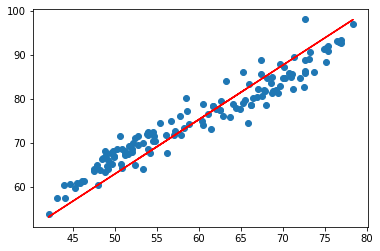

In [30]:
#Problem 3a

import numpy as np 
import time
import matplotlib.pyplot as plt

data = np.load('p3_data.npy');
x = data[:, 0];
y = data[:, 1];
lr = 0.0001;
num_iter = 100;

def predict(x, b_0, b_1):
    return b_1 + np.multiply(b_0, x);

def LSE(y, predict):
    return np.sum(predict - y) * np.sum(predict - y);

def cost_grad(data, b_0, b_1):
    x = data[:, 0];
    y = data[:, 1];
    y_pred = predict(x, b_0, b_1);
    cost = LSE(y, y_pred);
    grad_0 = np.sum(2 * x * (y_pred - y)) / len(y);
    grad_1 = np.sum((y_pred - y) * 2) / len(y);
    
    return [cost, grad_0, grad_1];

def weight_update(data, b_0, b_1, lr, num_iter):
    x = data[:, 0];
    y = data[:, 1];
    init_b_0 = b_0;
    init_b_1 = b_1;
    b_0_array = [];
    b_1_array = [];
    cost_array = [];
    diff_array = [];
    i = 0;
    
    for i in range(num_iter):
        b_0_array.append(b_0);
        b_1_array.append(b_1);
        cost, grad_0, grad_1 = cost_grad(data, b_0, b_1);
        cost_array.append(cost);
        b_0 = b_0 - lr * grad_0;
        b_1 = b_1 - lr * grad_1;

    return b_0_array, b_1_array, cost_array;

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y);
b_0_array, b_1_array, cost_array = weight_update(data, 1, 1, lr, num_iter);
last_arr = len(b_0_array);
y_line = predict(x, b_0_array[last_arr - 1], b_1_array[last_arr - 1]);
plt.plot(x, y_line, c = 'r');
print("b_0: ", b_0_array[last_arr - 1])
print("b_1: ", b_1_array[last_arr - 1])

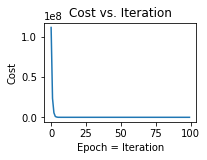

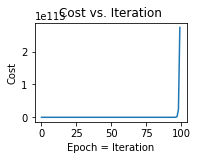

C:\Users\gandi\AppData\Local\Temp\ipykernel_1748\1113001590.py:17: RuntimeWarning: overflow encountered in double_scalars
  return np.sum(predict - y) * np.sum(predict - y);


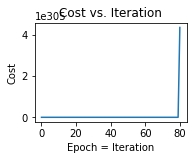

C:\Users\gandi\AppData\Local\Temp\ipykernel_1748\1113001590.py:14: RuntimeWarning: overflow encountered in multiply
  return b_1 + np.multiply(b_0, x);
C:\Users\gandi\AppData\Local\Temp\ipykernel_1748\1113001590.py:45: RuntimeWarning: invalid value encountered in double_scalars
  b_0 = b_0 - lr * grad_0;
C:\Users\gandi\AppData\Local\Temp\ipykernel_1748\1113001590.py:46: RuntimeWarning: invalid value encountered in double_scalars
  b_1 = b_1 - lr * grad_1;


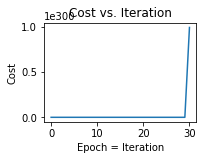

In [31]:
#Problem 3b

fig = plt.figure()
ax = fig.add_subplot(221)
b_0_array, b_1_array, cost_array = weight_update(data, 0, 0, 0.0002, num_iter);
last_arr = len(b_0_array);
last_cost = len(cost_array);

plt.plot(cost_array);
plt.xlabel("Epoch = Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration")
plt.show();

fig = plt.figure()
ax = fig.add_subplot(222)
b_0_array, b_1_array, cost_array = weight_update(data, 0, 0, 0.0006, num_iter);
last_arr = len(b_0_array);
last_cost = len(cost_array);

plt.plot(cost_array);
plt.xlabel("Epoch = Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration")
plt.show();

fig = plt.figure()
ax = fig.add_subplot(223)
b_0_array, b_1_array, cost_array = weight_update(data, 0, 0, 0.01, num_iter);
last_arr = len(b_0_array);
last_cost = len(cost_array);

plt.plot(cost_array);
plt.xlabel("Epoch = Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration")
plt.show();

fig = plt.figure()
ax = fig.add_subplot(224)
b_0_array, b_1_array, cost_array = weight_update(data, 0, 0, 10, num_iter);
last_arr = len(b_0_array);
last_cost = len(cost_array);

plt.plot(cost_array);
plt.xlabel("Epoch = Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration")
plt.show();

In [32]:
#Problem 3c

#I believe that the best learning rate would be something close to 0.0002 
# because the loss decrease was the best for a slower learning rate. This
# is because it has a slower rate of calculating, causing a higher 
# accuracy of reaching the good values and wont have the spike at the end 
# of the iterations as well.

In [33]:
#Problem 3d

#In Writeup

In [34]:
#Problem 3e

#The conclusion in regards to what the aproximate upper bound of learning 
# rate before divergence would be around 0.00027. This can be seen as at
# that learning rate, the first plot seems to still regress downwards but
# in a weird starcase pattern whereas if you increase it to 0.00028, the 
# plot begins to diverge to infinity.

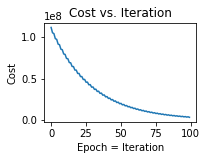

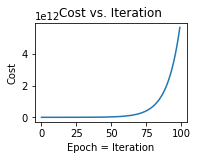

In [35]:
fig = plt.figure()
ax = fig.add_subplot(221)
b_0_array, b_1_array, cost_array = weight_update(data, 0, 0, 0.00027, num_iter);
last_arr = len(b_0_array);
last_cost = len(cost_array);

plt.plot(cost_array);
plt.xlabel("Epoch = Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration")
plt.show();

fig = plt.figure()
ax = fig.add_subplot(221)
b_0_array, b_1_array, cost_array = weight_update(data, 0, 0, 0.00028, num_iter);
last_arr = len(b_0_array);
last_cost = len(cost_array);

plt.plot(cost_array);
plt.xlabel("Epoch = Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration")
plt.show();


b_0:  1.231727217912758
b_1:  1.0084006190355324


Text(0, 0.5, 'Loss')

<Figure size 720x288 with 0 Axes>

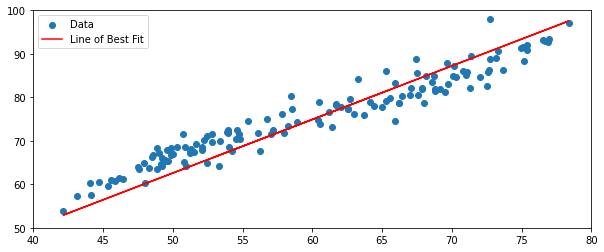

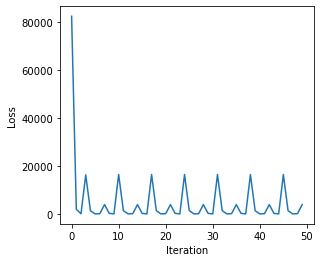

In [36]:
#Problem 3f

def update_mini_batch(data, b_0, b_1, lr, num_iter):
    x = data[:, 0];
    y = data[:, 1];
    B_0 = b_0;
    B_1 = b_1;
    B_0_list = [];
    B_1_list = [];
    cost_list = [];
    loss_list = [];
    b = 20;
    i = b;
    j = 0;
    
    while j in range(int(num_iter/b)):
        B_0_list.append(B_0);
        B_1_list.append(B_1);
        k = i - b;
        cost, grad0, grad1 = cost_grad(data[k:i-1], B_0, B_1);
        loss_list.append(cost);
        B_0 = B_0 - lr * grad0;
        B_1 = B_1 - lr * grad1;
        i = i + b;
        if i>=(len(x)):
            i = i - len(x)
        j = j+1;
        
    return B_0_list, B_1_list, loss_list

data = np.load('p3_data.npy');
x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(10,4))
plt.figure(figsize=(10,4))
plt.scatter(x, y, label = 'Data')


lr = 0.00017
num_iter = 1000
B_0, B_1, Loss = update_mini_batch(data, 1, 1, lr, num_iter)
b0 = B_0[-1]
b1 = B_1[-1]
print("b_0: ", b0)
print("b_1: ", b1)

plt.plot(x, b0*x + b1, c='r', label = 'Line of Best Fit')
plt.xlim(40,80)
plt.ylim(50,100)
plt.legend()

B_0, B_1, Loss = update_mini_batch(data, 1, 1, lr, num_iter)
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,2,1);
ax1.plot(Loss)
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Loss")

In [ ]:
# My observation for this plot is that the Loss is much more lower for the
# more batch iterations that get ran. Its interesting to see that the beginning
# losses decrease drastically but then begin to rise and fall slowly after that.